In [74]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from testCases_v2 import *
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
import matplotlib as mpl
%matplotlib inline

np.random.seed(1)

In [75]:
X, Y = load_planar_dataset()

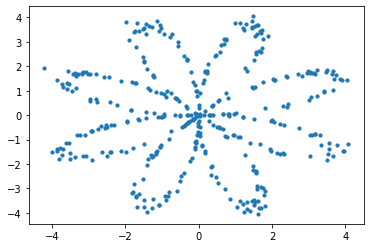

In [76]:
plt.scatter(X[0, :], X[1, :], s=10, cmap=plt.cm.Spectral);

In [77]:
#shape of X, Y and number of training examples
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1] 

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [78]:
#layer_sizes

def layer_sizes(X, Y):

    n_x = X.shape[0] # size of input layer
    n_h = 4
    n_y = Y.shape[0] # size of output layer

    return (n_x, n_h, n_y)

In [79]:
def initialize_parameters(n_x, n_h, n_y):

    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1)) 
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [80]:
#forward_propagation

def forward_propagation(X, parameters):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [81]:
#compute_cost

def compute_cost(A2, Y, parameters):
  
    m = Y.shape[1] # number of example

    # Compute the cross-entropy cost
    logprobs = np.dot(np.log(A2),Y.T)
    cost = - logprobs
    
    cost = float(np.squeeze(cost))
    assert(isinstance(cost, float))
    
    return cost

In [82]:
#backward_propagation

def backward_propagation(parameters, cache, X, Y):

    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1, A2, Z1 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2 = A2 - Y
    dW2 = (1./m) * (np.dot(dZ2,A1.T))
    db2 = (1./m) * (np.sum(dZ2, axis =1, keepdims = True))
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
    dW1 = np.dot(dZ1,X.T)
    db1 = (1./m) * (np.sum(dZ1, axis =1, keepdims = True))

    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [83]:
#update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):

    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['db2']
    db2 = grads['dW2']
    
    # Update rule for each parameter
    W1 = W1 - learning_rate*(dW1)
    b1 = b1 - learning_rate*(db1)
    W2 = W2 - learning_rate*(dW2)
    b2 = b2 - learning_rate*(db2)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [84]:
#nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_h = layer_sizes(X, Y)[1]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [85]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 1.385354


ValueError: operands could not be broadcast together with shapes (1,3) (1,4) 

In [86]:
# predict

def predict(parameters, X):
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

In [88]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


In [89]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%
